## IL181.009 Assignment2
### Sho Hihara

$T = \frac{1}{2}mv^2 = \frac{1}{2}m(\dot{x}^2+\dot{y}^2)$

$V = -mgy$

$L = T-V = \frac{1}{2}m(\dot{x}^2+\dot{y}^2) - mgy$ 

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x} + \frac{\partial R(\dot{x})}{\partial \dot{x}} = 0$

Applying the drag equation onto Rayleigh's dissipation function $R(\dot{q}) = \frac{1}{2}\Sigma k\dot{q}^2$, 

$k = \frac{1}{2}\rho v_{\dot{q}} C_D A_{\dot{q}}$

$R_{x} = \frac{1}{2} (\frac{1}{2}\rho v_{x} C_D A_{x}) \dot{x}^2$

$R_{y} = \frac{1}{2} (\frac{1}{2}\rho v_{y} C_D A_{y}) \dot{y}^2$

$\frac{\partial R(\dot{x})}{\partial \dot{x}} = \frac{1}{2}\rho v_{x} C_D A_{x} \dot{x}$

$\frac{\partial R(\dot{y})}{\partial \dot{y}} = \frac{1}{2}\rho v_{y} C_D A_{y} \dot{y}$

Finally,

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = m\ddot{x}$

$\frac{\partial L}{\partial x} = 0$

$\ddot{x} = -\frac{1}{2m}\rho v_x C_D A_x \dot{x}$

Likewise,

$\frac{d}{dt}\frac{\partial L}{\partial \dot{y}} = m\ddot{y}$

$\frac{\partial L}{\partial x} = -mg$

$m\ddot{y} + mg + \frac{1}{2}\rho v_{y} C_D A_{y} \dot{y}$

$\ddot{y} = -g -\frac{1}{2m}\rho v_y C_D A_y \dot{y}$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class flying_objects():
    g = -9.8
    m_missle = 100 #kg
    def __init__(self, name, position, velocity, mass, radius):
        self.name = "name"
        self.position = position
        self.velocity = velocity
        self.acceleration = [0, flying_objects.g]
        self.radius = radius
        self.mass = mass
            

def trajectory(flobj, coef_d=0.5, rho=1, wind=[0,0]):
    t = 0
    dt = 0.001
    ts = [0]
    g = -9.8
    xs = [flobj.position[0]]
    ys = [flobj.position[1]]
    x_dot_i = flobj.velocity[0]
    y_dot_i = flobj.velocity[1]
    
    if ys[0] >= 0:
        while flobj.position[1] >= 0:
            t += dt
            ts.append(t)

            new_x = flobj.position[0] + flobj.velocity[0]*dt + 0.5*flobj.acceleration[0]*dt**2
            xs.append(new_x)
            new_y = flobj.position[1] + flobj.velocity[1]*dt + 0.5*flobj.acceleration[1]*dt**2
            ys.append(new_y)
            flobj.position = [new_x, new_y]

            new_x_dot = flobj.velocity[0] + flobj.acceleration[0]*dt
            if flobj.velocity[0]*wind[0] > 1 and np.abs(flobj.velocity[0]) < np.abs(wind[0]):
                pass
            else:
                new_x_dot += 0.1*coef_d*rho*flobj.radius**2*np.pi*wind[0]*dt
            new_y_dot = flobj.velocity[1] + flobj.acceleration[1]*dt
            if flobj.velocity[1]*wind[1] > 1 and np.abs(flobj.velocity[1]) < np.abs(wind[1]):
                pass
            else:
                new_y_dot += 0.1*coef_d*rho*flobj.radius**2*np.pi*wind[1]*dt
            flobj.velocity = [new_x_dot, new_y_dot]

            new_x_ddot = 0 - 0.001*(
                coef_d*rho*np.abs(flobj.velocity[0])*flobj.radius**2*np.pi/flobj.mass
                )*dt*flobj.velocity[0]
            new_y_ddot = g  - 0.001*(
                coef_d*rho*np.abs(flobj.velocity[1])*flobj.radius**2*np.pi/flobj.mass
                )*dt*flobj.velocity[1]
            flobj.acceleration = [new_x_ddot, new_y_ddot]
    else:
        print("Launching point not above ground")

    return xs, ys
      

## Different radius

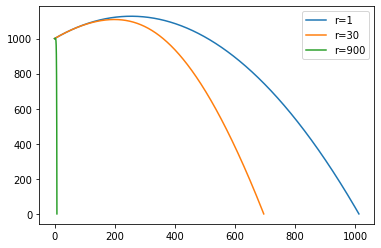

In [ ]:
rads = [1,30,900]
for r in rads:
    alien_missile = flying_objects("alien_missile", [0, 1000], [50, 50], 1, r)
    results = trajectory(alien_missile)
    plt.plot(results[0], results[1], label=f"r={alien_missile.radius}")
plt.legend()
plt.show()

## Constant Wind

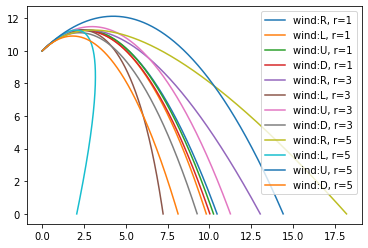

In [ ]:
wind = {"R":[1,0], "L":[-1,0], "U":[0,1], "D":[0,-1]}
rads = [1,3,5]

for r in rads:
    for w_key in wind:
        alien_missile = flying_objects("alien_missile", [0, 10], [5, 5], 1, r)
        results = trajectory(alien_missile, wind=wind[w_key])
        plt.plot(results[0], results[1], label=f"wind:{w_key}, r={alien_missile.radius}")

plt.legend()
plt.show()

## Monte Carlo

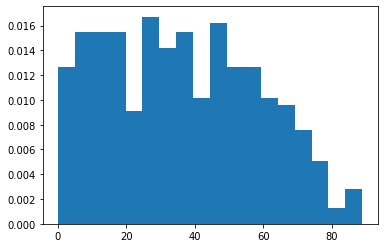

In [ ]:
def random_coin(p):
    unif = np.random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gaussian_mcmc(func, n_samples):
    states = []
    burn_in = int(n_samples*0.2)
    current_angle = np.random.uniform(0, 90)
    for i in range(n_samples):
        states.append(current_angle)
        movement_angle = np.random.uniform(0, 90)
        
        curr_missile = flying_objects(
            "curr_missile", [0, 1000], 
            [75*np.cos(np.deg2rad(current_angle)), 75*np.sin(np.deg2rad(current_angle))], 1, 1
            )
        move_missile = flying_objects(
            "move_missile", [0, 1000], 
            [75*np.cos(np.deg2rad(movement_angle)), 75*np.sin(np.deg2rad(movement_angle))], 1, 1
            )
        
        curr_d = func(curr_missile)[0][-1]
        move_d = func(move_missile)[0][-1]
        
        acceptance = min(move_d/curr_d,1)
        if random_coin(acceptance):
            current_angle = movement_angle
    return states[burn_in:]
    
dist = gaussian_mcmc(trajectory, n_samples=1000)

plt.hist(dist, density=True, bins=18) 
plt.show()

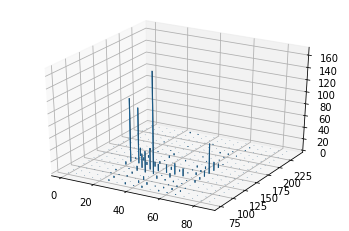

In [ ]:
wind = [0,0]
target_distance = 1500
rho = 1
c_d = 0.295

def cannonsearch_mcmc(func, n_samples, p):
    angles = []
    vels = []
    burn_in = int(n_samples*0.2)

    current_angle = np.random.uniform(20, 70)
    current_initv = np.random.uniform(target_distance/20, target_distance/6)

    for i in range(n_samples):
        angles.append(current_angle)
        vels.append(current_initv)
        movement_angle = np.random.uniform(20, 70)
        movement_initv = np.random.uniform(target_distance/20, target_distance/6)
        
        curr_missile = flying_objects(
            "curr_missile", 
            p["launch_coordinate"], 
            [current_initv*np.cos(np.deg2rad(current_angle)), current_initv*np.sin(np.deg2rad(current_angle))], 
            1, 1)
        move_missile = flying_objects(
            "move_missile", 
            p["launch_coordinate"], 
            [movement_initv*np.cos(np.deg2rad(movement_angle)), movement_initv*np.sin(np.deg2rad(movement_angle))], 
            1, 1)
        
        curr_gap = np.abs(target_distance - func(curr_missile, 
                                                  coef_d=p["drag_coef"], 
                                                  rho=p["air_density"], 
                                                  wind=p["wind"])[0][-1])
        move_gap = np.abs(target_distance - func(move_missile, 
                                                  coef_d=p["drag_coef"], 
                                                  rho=p["air_density"], 
                                                  wind=p["wind"])[0][-1])

        acceptance = min(curr_gap/move_gap,1) 
        #because we want to accept for sure if the new gap is smaller
        #and less eager to accept the smaller the current gap is 
        if random_coin(acceptance):
            current_angle = movement_angle
            current_initv = movement_initv

    return angles[burn_in:], vels[burn_in:]

parameters = {"wind":wind, "launch_coordinate": [0,0], 
              "bombing_coordinate": [0,np.abs(target_distance)], 
              "air_density":rho, "drag_coef":c_d}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = cannonsearch_mcmc(trajectory, n_samples=1000, p=parameters)
hist, xedges, yedges = np.histogram2d(
    x, y,bins=18, range=[[0, 90],[target_distance/20, target_distance/6]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()


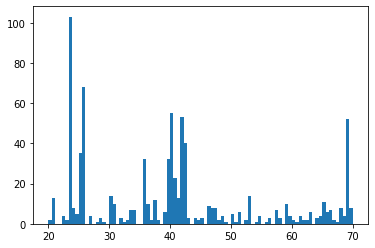

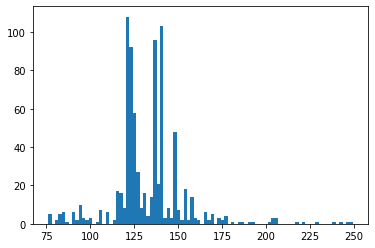

Best angle: 24.0
Best init velocity: 120.0


In [ ]:
plt.hist(x,bins=90)
plt.show()

plt.hist(y,bins=90)
plt.show()

xround = list(np.around(x))
yround = list(np.around(y, decimals=-1))
a = {x:xround.count(x) for x in sorted(xround)}
b = {y:yround.count(y) for y in sorted(yround)}
print(f"Best angle: {max(a, key=a.get)}")
print(f"Best init velocity: {max(b, key=b.get)}")

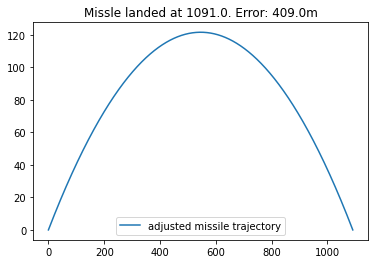

In [ ]:
adjusted_missile = flying_objects("adjusted_missile", [0, 0], 
                                  [max(b, key=b.get)*np.cos(np.deg2rad(max(a, key=a.get))), 
                                   max(b, key=b.get)*np.sin(np.deg2rad(max(a, key=a.get)))],
                                  1, 1)
results = trajectory(adjusted_missile)
plt.plot(results[0], results[1], label="adjusted missile trajectory")
plt.title(f"Missle landed at {np.round(results[0][-1])}. Error: {np.round(np.abs(target_distance - results[0][-1]))}m")
plt.legend()
plt.show()

While demonstrated with no wind, the above code will execute under any arbitrary constant wind condition specified as a tuple.